#Задание
**Цель: изучить применение дерева решений в рамках задачи регрессии**

Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**

In [ ]:
data = fetch_california_housing()
fetch_california_housing = pd.DataFrame(data=data.data, columns=data.feature_names)
fetch_california_housing['MedHouseVal'] = data.target
fetch_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**2) Проведите первичный анализ.**
   * Проверьте данные на пропуски. Удалите в случае обнаружения.
   *Нормализуйте один из признаков.

In [ ]:
fetch_california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков нет, посмотрим основные данные статистики

In [ ]:
fetch_california_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Нормализуем признак с наибольшим значением корреляции с целевой переменной MedHouseVal

In [ ]:
corr = fetch_california_housing.corr()
corr.style.background_gradient(cmap='coolwarm')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
fetch_california_housing['MedInc_norm']=(fetch_california_housing['MedInc']-fetch_california_housing['MedInc'].min())/(fetch_california_housing['MedInc'].max()-fetch_california_housing['MedInc'].min())

In [ ]:
fetch_california_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedInc_norm
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.539668
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.538027
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.466028
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.354699
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.230776


**3) Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [ ]:
X = fetch_california_housing[['MedInc_norm', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [ ]:
y = fetch_california_housing['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

**4) Обучите модель регрессии на обучающем множестве.**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

**5)Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [ ]:
predict = lr.predict(X_test)

In [ ]:
lr.score(X_test, y_test)

0.575787706032451

**6) Обучите дерево решений на обучающем множестве.**
* Повторите п. 5 для полученной модели.
* Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.

In [ ]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
predict = dtr.predict(X_test)

In [ ]:
dtr.score(X_test, y_test)

0.622075845135081

In [ ]:
from sklearn import tree

In [ ]:
# функция визуализирует дерево решений(первые 10 строк) 
def plt_tree(X,y): 
    dtr = DecisionTreeRegressor(random_state=42)
    dtr.fit(X[:10], y[:10])
    fig = plt.figure(figsize=(20,12))
    tree.plot_tree(dtr,feature_names=fetch_california_housing.columns,filled=True)   

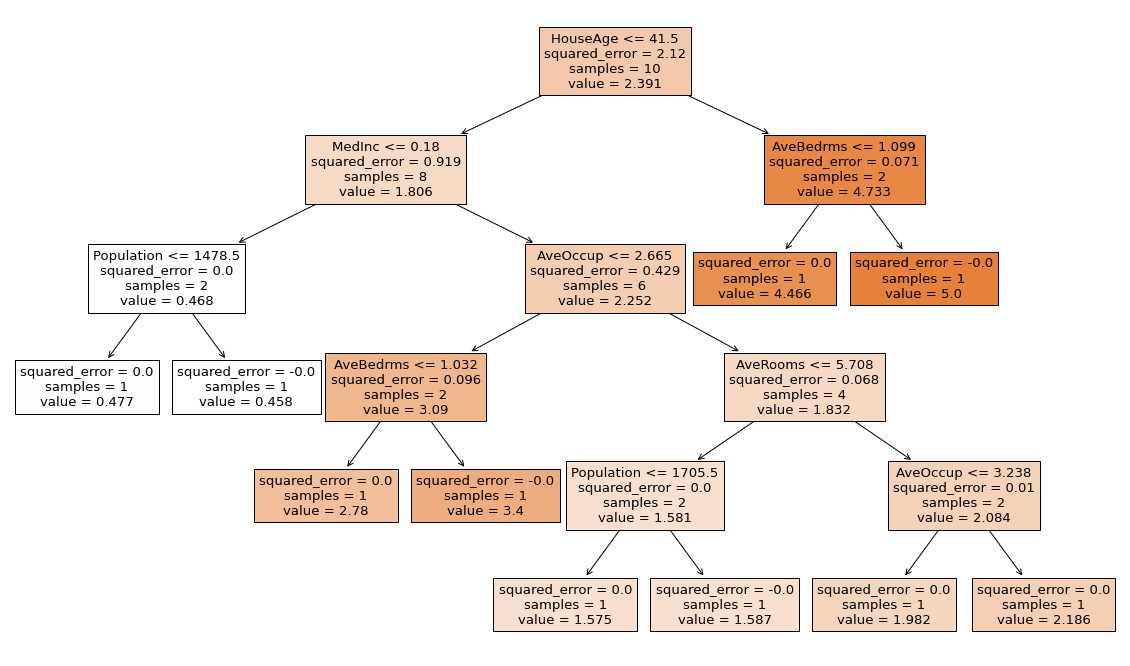

In [ ]:
plt_tree(X_test, y_test)

**7) Оптимизируйте глубину дерева (max_depth).**

* Оптимизируйте ещё один параметр модели на выбор.

* Повторите п. 5 для полученной модели.

In [ ]:
# функция выводит на печать max_depth c лучшим скором
def best_max_depth(X,y, max_max_depth = 20):
  dct = {}
  for i in range(1,max_max_depth):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
      dtr = DecisionTreeRegressor(random_state=42, max_depth= i)
      dtr.fit(X_train, y_train)
      predict = dtr.predict(X_test)
      scr = dtr.score(X_test, y_test)
      dct[i] = scr
  print(f'Лучший max_depth = {list(dct.keys())[list(dct.values()).index(max(dct.values()))]} score {max(dct.values())}')



In [ ]:
best_max_depth(X,y)

Лучший max_depth = 9 score 0.6832529836308363


Возьмем лучший max_depth и оптимизируем min_samples_leaf

In [ ]:
# функция выводит на печать min_samples_leaf c лучшим скором
def best_min_samples_leaf(X,y, samples_leaf = 20):
  dct = {}
  for i in range(1,samples_leaf):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
      dtr = DecisionTreeRegressor(random_state=42, max_depth= 9, min_samples_leaf = i)
      dtr.fit(X_train, y_train)
      predict = dtr.predict(X_test)
      scr = dtr.score(X_test, y_test)
      dct[i] = scr
  print(f'Лучший min_samples_leaf = {list(dct.keys())[list(dct.values()).index(max(dct.values()))]} score {max(dct.values())}')

In [ ]:
best_min_samples_leaf(X,y)

Лучший min_samples_leaf = 16 score 0.704970793056241


**8)Сформулируйте выводы по проделанной работе.**

**a. Сравните точность двух моделей.**

Дерево решений(score 0.7) в данной задаче обучилось лучше, чем линейная регрессия(score 0.57)

**b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

При выборе модели машинного обучения я бы обратил внимание на метрики модели, у которой лучше, ту в дальнейшем бы и использовал. Но в тоже время учитывал бы недостатки моделей. Например если решение нелинейное и признаки коллениарны, то линейную регрессию лучше не использовать, а дерево решений лучше не использовать например при прогнозировании временных рядов.  